In [1]:
!conda update pandas -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.5.8

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-0.23.3              |   py36hf8a1672_1        27.8 MB  conda-forge

The following packages will be UPDATED:

    pandas: 0.23.1-py36h637b7d7_0 defaults --> 0.23.3-py36hf8a1672_1 conda-forge


pandas-0.23.3        | 27.8 MB | ####################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [1]:
# Import things and run data file

In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np
dfs = pd.ExcelFile("raw_survey_data.xlsx")

In [3]:
dfs = dfs.parse()

In [4]:
# Getting the extra variables only

In [5]:
extra_variables = dfs.iloc[:,-65:-1]

In [6]:
IV = dfs.iloc[:,14:17]

In [7]:
IVandDV = pd.concat([IV, extra_variables], axis=1, join_axes=[IV.index])

In [8]:
# Clone the data

In [9]:
Newdf = IVandDV.copy()
Newdf = Newdf.apply(lambda x: x.astype(str).str.lower())

In [10]:
# Grouping technology together

In [11]:
Department = Newdf.iloc[:,0]

In [12]:
Department = Department.replace("technolgy","technology")
Department = Department.replace("tis","technology")
Department = Department.replace("technology/solutions delivery/web apps","technology")
Department = Department.replace("solutions delivery","technology")
Department = Department.replace("technology and obs","technology")
Department = Department.replace("office of the cio","technology")
Department = Department.replace("i&o","technology")
Department = Department.replace("technology in product creation","technology")
Department = Department.replace("solutions delivery, technology information services","technology")
Department = Department.replace("technology -> government services","technology")
Department = Department.replace("operations","technology")

In [13]:
# Grouping science together

In [14]:
Department = Department.replace("climate science","science")
Department = Department.replace("weather science it","science")
Department = Department.replace("obs r&d","science")
Department = Department.replace("applied science","science")

In [15]:
# Grouping rest together

In [16]:
Department = Department.replace("business group","other")
Department = Department.replace("cfo","other")

In [17]:
departments = ['technology', 'science', 'other']
maindepartments = ['technology', 'science']

In [18]:
#Zipping it back
Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] = Department

In [19]:
# Cleaning the team variable

In [20]:
Newdf = Newdf.replace(['netowrk services', 'networks services'], 'network services')
Newdf = Newdf.replace(['security testing', 'cyber, security and resilience - business continuity', 'cyber security and resilience'], 'security')
Newdf = Newdf.replace(['solutions delivery - data services', 'solutions delivery > government services', 'government technology', 'defence'], 'solutions delivery')
Newdf = Newdf.replace(['ccc', 'cloud  capability', 'cloud capabilities', 'cloud capability catalogue - arcus squad', 'cloud capability', 'i & oforecasting applications support', 'i&o', 'i&o architecture', 'i&o cloud capability', 'infrastructure', 'network services', 'underpinning capability'], 'infrastructure and operations')
Newdf = Newdf.replace('cloud ops', 'cloudops')
Newdf = Newdf.replace('obs', 'observations')
Newdf = Newdf.replace('the informatics lab', 'informatics lab')
Newdf = Newdf.replace(['tis - data services', 'data services', 'aardwolf', 'awesome', 'rru', 'alchemy', 'geoapps', 'geospatial applications - kraken squad', 'moose', 'metdb', 'plans and performance', 'avd (analysis, visualisation and data)', 'avd', 'avd (within tis)', 'analysis, visualisation and data', 'broadcast graphics team'], 'technology and information service')
Newdf = Newdf.replace(['hpc & collaboration', 'hpc team'], 'high performance computing')

In [21]:
Newdf = Newdf.replace(['climate', 'climate information for international development', 'climate science it (data delivery)', 'understanding climate change', 'mdvp operational systems', 'it apps', 'crum'], 'climate science')
Newdf = Newdf.replace(['hpc optimisation team', 'hpc optimisation'], 'high performance computing optimisation')
Newdf = Newdf.replace(['vipp', 'weather science verification, impacts, and post-processing - specifically, post-processing and verification systems', 'verification, impacts and post-processing', 'weather science it', 'modelling infrastructure support systems a.k.a. fcm, rose, cylc, team', 'satellite applications', 'convective-scale data assimilation and ensembles'], 'weather science')
Newdf = Newdf.replace(['sferics', 'atmospheric processes and parameterizations'], 'atmostpheric science')
Newdf = Newdf.replace(['met research unit / obr / foundation science', 'ofrd'], 'other' )

In [22]:
columnlist = list(Newdf.columns.values)
columnlist

['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?',
 '2 : Where do you work within the Met Office hierarchy? - What team do you work in within that department?',
 '3 : What is your job role within the team?',
 '21 : Do you work with technology as a hobby outside work?',
 '22 : For how many years have you worked in your current role?',
 '23 : Have you worked in similar roles before this?  If so for how many years?',
 '24 : Are you currently a student (including PhD, part time and apprenticeships)?',
 '25 : What is your highest level of academic qualification?',
 '25 : What is your highest level of academic qualification?Other, please specify comment',
 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, multiple answers may be selected. Computer science, computer engineering, or software engineering',
 '26 : If you have a degree, what was your specialism? In cases of multiple degrees, mult

In [23]:
#Writing functions

In [24]:
def valuecount_by_department(department, column):
    countframe = pd.DataFrame(Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department])[column].value_counts(dropna=True, sort=True).to_frame(department)
    return countframe

In [25]:
def plot_dataframe(dataframe, title):
    fig = dataframe.plot.bar(grid=True, label=True, edgecolor= '#B9DC0C', linewidth=2, figsize=(15,10))
    fig.set_facecolor('#2A2A2A')
    plt.xlabel('Department')
    plt.title(title)
    plt.xticks(rotation='horizontal')
    picturename = title + ".png"
    plt.savefig(fname=picturename)

In [70]:
def plot_stacked(dataframe, title):
    fig = dataframe.plot.bar(grid=True, stacked=True, label=True, edgecolor= '#B9DC0C', linewidth=2, figsize=(15,10))
    fig.set_facecolor('#2A2A2A')
    plt.title(title)
    picturename = title + ".png"
    plt.savefig(fname=picturename)

In [74]:
def plot_1way(dataframe, title):
    fig = dataframe.plot.bar(grid=True, stacked=True, label=True, color= '#B9DC0C', figsize=(15,10), legend=False)
    fig.set_facecolor('#2A2A2A')
    plt.title(title)
    picturename = title + ".png"
    plt.savefig(fname=picturename)

In [28]:
technology_hobby = valuecount_by_department('technology', '21 : Do you work with technology as a hobby outside work?')
science_hobby = valuecount_by_department('science', '21 : Do you work with technology as a hobby outside work?')
hobby_summary = pd.concat([technology_hobby, science_hobby], axis=1)
hobby_summary = hobby_summary.iloc[:2, :]
hobby_summary = pd.DataFrame.transpose(hobby_summary)
hobby_summary

,yes,no
technology,52,14
science,15,8


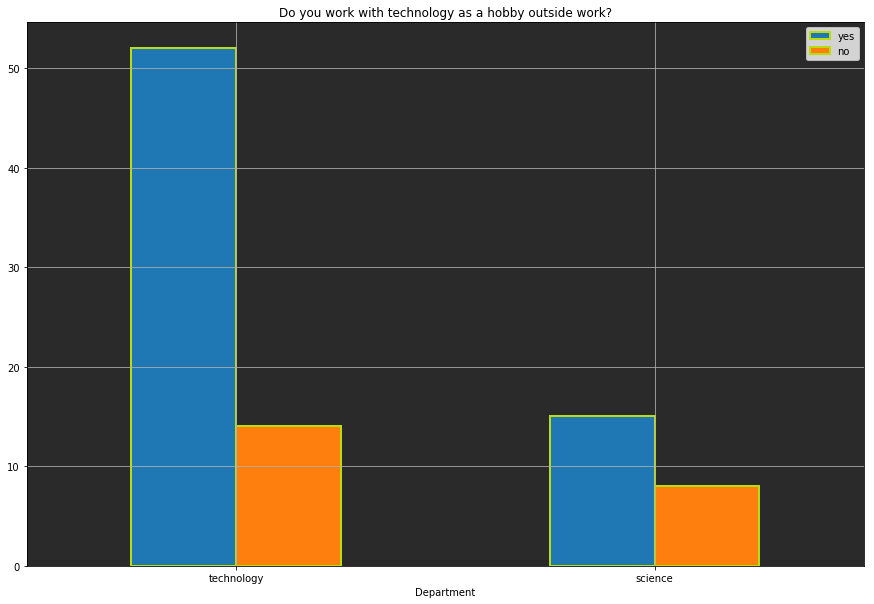

In [29]:
plot_dataframe(hobby_summary, 'Do you work with technology as a hobby outside work?')

In [30]:
# Dealing with highest qualification

In [31]:
other_qualification = Newdf.loc[Newdf['25 : What is your highest level of academic qualification?'] == 'other, please specify']

In [32]:
listed_qualification = Newdf.loc[Newdf['25 : What is your highest level of academic qualification?'] != 'other, please specify']

In [33]:
other_qualification = other_qualification.replace('higher national certificate', 'hnc')

In [34]:
hnc = other_qualification.loc[other_qualification['25 : What is your highest level of academic qualification?Other, please specify comment'] == 'hnc']

hnc = hnc.replace('other, please specify', 'higher national certificate')

In [35]:
btec = other_qualification.loc[other_qualification['25 : What is your highest level of academic qualification?Other, please specify comment'] == 'btec']

btec = btec.replace('other, please specify', 'btec')

In [36]:
professional_qualifications = other_qualification.loc[other_qualification['25 : What is your highest level of academic qualification?Other, please specify comment'] == 'professional qualifications']

professional_qualifications = professional_qualifications.replace('other, please specify', 'professional qualifications')

In [37]:
hnd = other_qualification.loc[other_qualification['25 : What is your highest level of academic qualification?Other, please specify comment'] == 'hnd']

hnd = hnd.replace('other, please specify', 'higher national diploma')

In [38]:
Newdf = pd.concat([listed_qualification, hnc, btec, professional_qualifications, hnd])

In [39]:
Newdf = Newdf.drop(labels = ['25 : What is your highest level of academic qualification?Other, please specify comment'], axis = 1)

In [40]:
Newdf = Newdf.replace(['gcse/o-level', 'btec'], '1. secondary level')
Newdf = Newdf.replace(['as/a-level', 'higher national certificate', 'higher national diploma'], '2. pre-university level')
Newdf = Newdf.replace("bachelor's degree", '3. undergraduate level')
Newdf = Newdf.replace("master's degree", "4. postgraduate level - master's")
Newdf = Newdf.replace("doctoral degree", "5. postgraduate level - doctoral")
Newdf = Newdf.replace("professional qualifications", "6. professional qualifications")

In [42]:
technology_qualification = valuecount_by_department('technology', '25 : What is your highest level of academic qualification?')
science_qualification = valuecount_by_department('science', '25 : What is your highest level of academic qualification?')
others_qualification = valuecount_by_department('other', '25 : What is your highest level of academic qualification?')
qualification_summary = pd.concat([technology_qualification, science_qualification, others_qualification], axis=1)
qualification_summary = pd.DataFrame.transpose(qualification_summary)
qualification_summary = qualification_summary.replace('NaN', 0)
qualification_summary = qualification_summary.drop('nan', axis=1)
qualification_summary

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,1. secondary level,2. pre-university level,3. undergraduate level,4. postgraduate level - master's,5. postgraduate level - doctoral,6. professional qualifications
technology,3.0,16.0,29.0,16.0,2.0,NaN
science,NaN,NaN,NaN,7.0,18.0,NaN
other,NaN,NaN,NaN,1.0,NaN,1.0


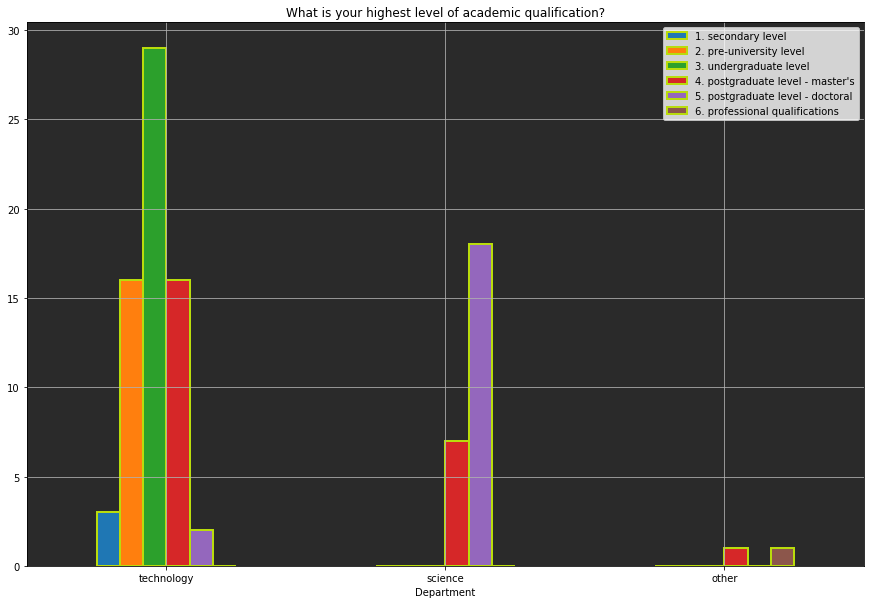

In [43]:
plot_dataframe(qualification_summary, "What is your highest level of academic qualification?")

In [44]:
# Wellbeing

In [45]:
Newdf['33 : How much time on average do you spend on a computer per day?'].value_counts()

5 - 8 hours      62
9 - 12 hours     28
1 - 4 hours       4
over 12 hours     1
Name: 33 : How much time on average do you spend on a computer per day?, dtype: int64

In [46]:
Newdf = Newdf.replace('1 - 4 hours', 2.5)
Newdf = Newdf.replace('5 - 8 hours', 6.5)
Newdf = Newdf.replace('9 - 12 hours', 10.5)
Newdf = Newdf.replace('over 12 hours', 18)

In [47]:
Newdf['34 : How much time on average do you spend outside per day?'].value_counts()

1 - 2 hours             41
30 - 59 minutes         35
less than 30 minutes    10
3 - 4 hours              8
nan                      1
Name: 34 : How much time on average do you spend outside per day?, dtype: int64

In [48]:
Newdf = Newdf.replace('less than 30 minutes', 0.5)
Newdf = Newdf.replace('30 - 59 minutes', 0.75)
Newdf = Newdf.replace('1 - 2 hours', 1.5)
Newdf = Newdf.replace('3 - 4 hours', 3.5)

In [49]:
Newdf['35 : How many times do you exercise on average per week?'].value_counts()

1 - 2 times per week          33
3 - 4 times per week          27
daily or almost every day     22
i don't typically exercise     7
1 - 2 times per month          4
nan                            2
Name: 35 : How many times do you exercise on average per week?, dtype: int64

In [50]:
Newdf = Newdf.replace(["i don't typically exercise", "never"], 0)
Newdf = Newdf.replace("1 - 2 times per month", 1)
Newdf = Newdf.replace("1 - 2 times per week", 2)
Newdf = Newdf.replace("3 - 4 times per week", 3)
Newdf = Newdf.replace("daily or almost every day", 4)

In [51]:
Newdf = Newdf.replace('nan', np.nan)
Wellbeingdata = Newdf.iloc[:, -10:-6]
Wellbeingdata.corr('pearson')

,33 : How much time on average do you spend on a computer per day?,34 : How much time on average do you spend outside per day?,35 : How many times do you exercise on average per week?,36 : How many times on average do you skip a meal to be productive per week?
33 : How much time on average do you spend on a computer per day?,1.000000,0.012485,-0.009185,0.087797
34 : How much time on average do you spend outside per day?,0.012485,1.000000,0.186943,-0.096582
35 : How many times do you exercise on average per week?,-0.009185,0.186943,1.000000,-0.062128
36 : How many times on average do you skip a meal to be productive per week?,0.087797,-0.096582,-0.062128,1.000000


In [52]:
# Write a function to calculate mean wellbeing indexes for department

In [53]:
def wbdepartment(department):
    return Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department].iloc[:, -10:-6].mean().to_frame(department)

In [54]:
technology_wb = wbdepartment('technology')
science_wb = wbdepartment('science')
others_wb = wbdepartment('others')
compare_wellbeing = pd.concat([technology_wb, science_wb, others_wb], axis=1)
compare_wellbeing = pd.DataFrame.transpose(compare_wellbeing)
compare_wellbeing

,33 : How much time on average do you spend on a computer per day?,34 : How much time on average do you spend outside per day?,35 : How many times do you exercise on average per week?,36 : How many times on average do you skip a meal to be productive per week?
technology,7.669118,1.3125,2.492537,0.373134
science,7.780000,1.2000,2.720000,0.280000
others,NaN,NaN,NaN,NaN


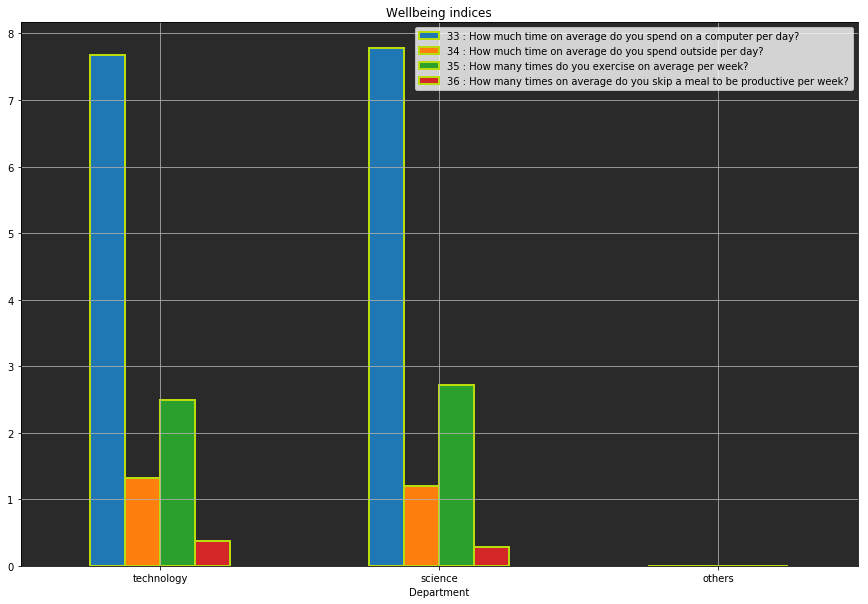

In [55]:
plot_dataframe(compare_wellbeing, 'Wellbeing indices')

In [56]:
Newdf.rename(index=str, columns = {'27 : Have you taken part in any other forms of education? Taught yourself a new skill without taking a formal course': "Taught yourself a new skill without taking a formal course",'27 : Have you taken part in any other forms of education? Taken an online course': 'Taken an online course','27 : Have you taken part in any other forms of education? Received on the job training': 'Received on the job training','27 : Have you taken part in any other forms of education? Taken any extracurricular in person course': 'Taken any extracurricular in person course','27 : Have you taken part in any other forms of education? Completed an industry certification programme': 'Completed an industry certification programme','27 : Have you taken part in any other forms of education? I have not taken part in others forms of education': 'I have not taken part in others forms of education','27 : Have you taken part in any other forms of education? Other, please specify': 'Other','27 : Have you taken part in any other forms of education? Other, please specifycomment': 'Specified other'}, inplace=True)

In [57]:
# Other_education = Newdf.iloc[:, -43:-35]
# Other_education.columns = ["Taught yourself a new skill without taking a formal course", "Taken an online course", "Received on the job training", "Taken any extracurricular in person course", "Completed an industry certification programme", "I have not taken part in others forms of education", "Other", "Specified other"]

In [58]:
Overall_other_education_summary = {}

In [59]:
def get_number_of_methods(column):
    length = len(Newdf.loc[Newdf[column] == "yes"])
    Overall_other_education_summary[column] = length

In [60]:
for column in Newdf.iloc[:, -43:-36].columns:
    get_number_of_methods(column)

In [61]:
Overall_other_education_summary = pd.DataFrame.from_dict(Overall_other_education_summary, orient='index')

In [62]:
Overall_other_education_summary

,0
Taught yourself a new skill without taking a formal course,80
Taken an online course,60
Received on the job training,71
Taken any extracurricular in person course,23
Completed an industry certification programme,28
I have not taken part in others forms of education,1
Other,3


In [63]:
Overall_other_education_summary.columns = ['']

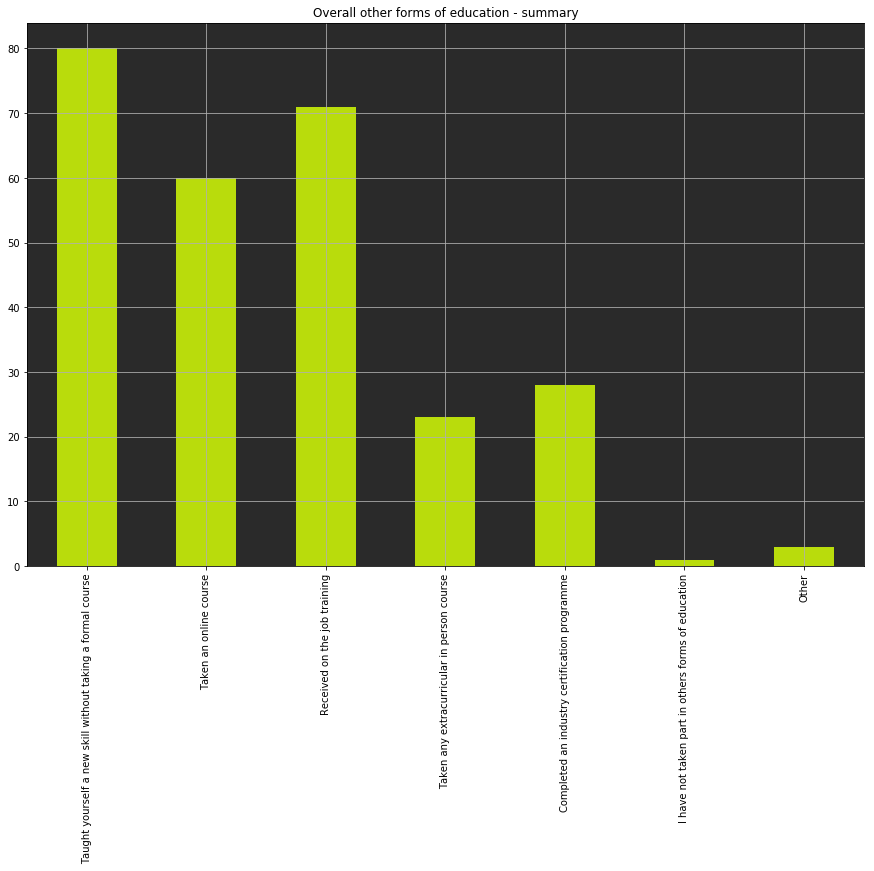

In [75]:
plot_1way(Overall_other_education_summary, 'Overall other forms of education - summary')

In [78]:
def get_specific_other_education(department):    
    specificdict = {} 
    tempdf = Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department]
    for column in Newdf.iloc[:, -43:-36].columns:
        length = len(tempdf.loc[tempdf[column] == "yes"])  
        specificdict[column] = length
    return specificdict
        

In [79]:
technologydict = get_specific_other_education('technology')
technologyframe = pd.DataFrame.from_dict(technologydict, orient='index')
sciencedict = get_specific_other_education('science')
scienceframe = pd.DataFrame.from_dict(sciencedict, orient='index')
otherdict = get_specific_other_education('other')
otherframe = pd.DataFrame.from_dict(otherdict, orient='index')
othereducationdict = {'technology': technologydict, 'science': sciencedict, 'others': otherdict}
othereducationframe = pd.DataFrame.from_dict(othereducationdict)
othereducationframe

,technology,science,others
Completed an industry certification programme,23,4,1
I have not taken part in others forms of education,0,1,0
Other,3,0,0
Received on the job training,49,20,2
Taken an online course,48,11,1
Taken any extracurricular in person course,17,5,1
Taught yourself a new skill without taking a formal course,55,23,2


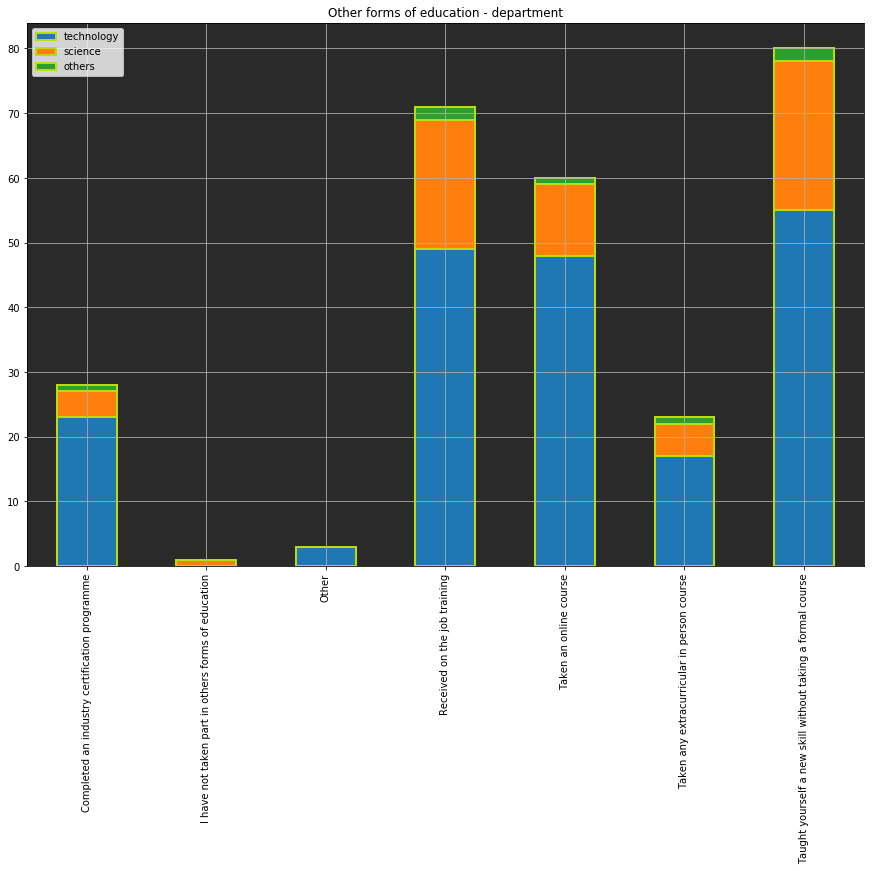

In [80]:
plot_stacked(othereducationframe, 'Other forms of education - department')

In [84]:
Newdf.rename(index=str, columns = {'28 : Do you use any of these methods to learn independently of formal training? The official documentation and/or standards for the technology': "The official documentation and/or standards for the technology", '28 : Do you use any of these methods to learn independently of formal training? A book or e-book': "A book or e-book", '28 : Do you use any of these methods to learn independently of formal training? Internal Met Office documentation or Yammer':"Internal Met Office documentation or Yammer", '28 : Do you use any of these methods to learn independently of formal training? External online communities': "External online communities", "28 : Do you use any of these methods to learn independently of formal training? The technology's online help system": "The technology's online help system", '28 : Do you use any of these methods to learn independently of formal training? Tapping your network of friends and peers versed in the technology': "Tapping your network of friends and peers versed in the technology", '28 : Do you use any of these methods to learn independently of formal training? Pre-scheduled tutoring or mentoring sessions with a colleague': "Pre-scheduled tutoring or mentoring sessions with a colleague", "28 : Do you use any of these methods to learn independently of formal training? I don't use methods to learn independent of formal training": "I don't use methods to learn independent of formal training", '28 : Do you use any of these methods to learn independently of formal training? Other, please specify': "Other independent learning or formal training", '28 : Do you use any of these methods to learn independently of formal training? Other, please specifycomment': "Specified other independent learning or formal training"}, inplace=True)

In [92]:
list(Newdf.iloc[:, -36:-26].columns)

['Specified other',
 'The official documentation and/or standards for the technology',
 'A book or e-book',
 'Internal Met Office documentation or Yammer',
 'External online communities',
 "The technology's online help system",
 'Tapping your network of friends and peers versed in the technology',
 'Pre-scheduled tutoring or mentoring sessions with a colleague',
 "I don't use methods to learn independent of formal training",
 'Other independent learning or formal training']

In [95]:
def get_specific_other_learning(department):    
    specificdict = {} 
    tempdf = Newdf.loc[Newdf['1 : Where do you work within the Met Office hierarchy? - What department do you work in (eg. Technology, Science)?'] == department]
    for column in list(Newdf.iloc[:, -35:-26].columns):
        length = len(tempdf.loc[tempdf[column] == "yes"])  
        specificdict[column] = length
    return specificdict

In [96]:
technologydict1 = get_specific_other_learning('technology')
technologyframe1 = pd.DataFrame.from_dict(technologydict1, orient='index')
sciencedict1 = get_specific_other_learning('science')
scienceframe1 = pd.DataFrame.from_dict(sciencedict1, orient='index')
otherdict1 = get_specific_other_learning('other')
otherframe1 = pd.DataFrame.from_dict(otherdict1, orient='index')
otherlearningdict = {'technology': technologydict1, 'science': sciencedict1, 'others': otherdict1}
otherlearningframe = pd.DataFrame.from_dict(otherlearningdict)
otherlearningframe

,technology,science,others
A book or e-book,42,16,2
External online communities,48,20,1
I don't use methods to learn independent of formal training,0,0,0
Internal Met Office documentation or Yammer,37,17,2
Other independent learning or formal training,4,0,0
Pre-scheduled tutoring or mentoring sessions with a colleague,12,2,1
Tapping your network of friends and peers versed in the technology,50,20,2
The official documentation and/or standards for the technology,56,22,2
The technology's online help system,49,18,2


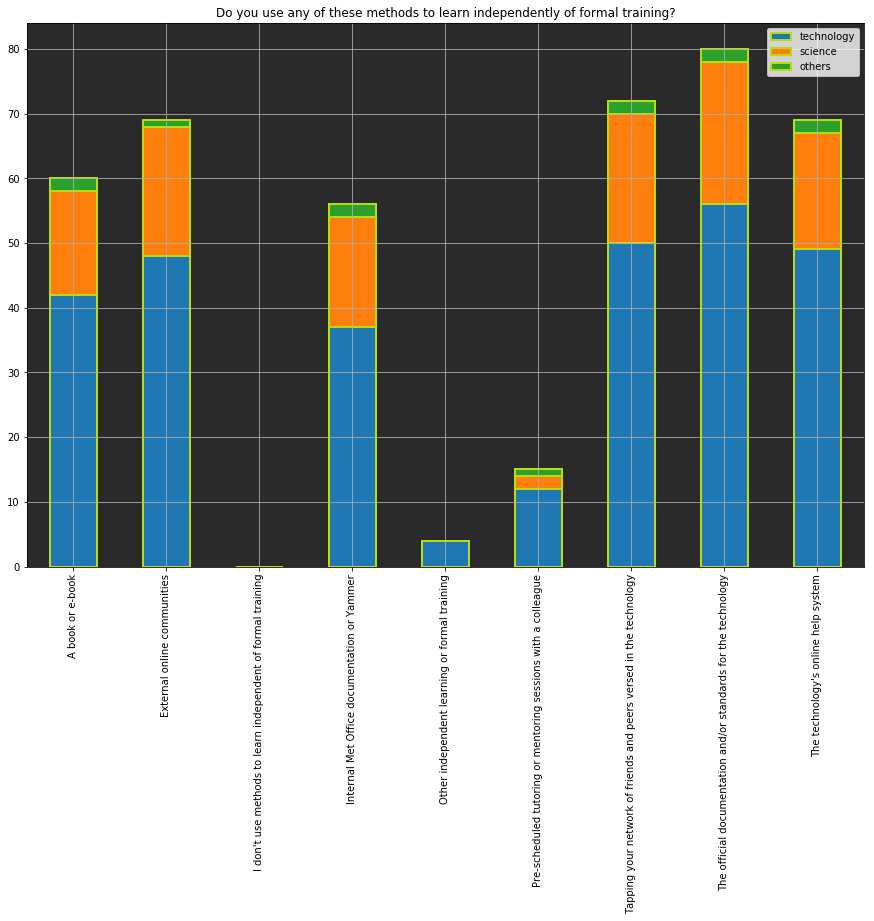

In [98]:
plot_stacked(otherlearningframe, 'Do you use any of these methods to learn independently of formal training?')